In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time
import copy

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
! gdown --id 15gMukOtjZUq0akoASI_tUnQTFWuuRsXf
! gdown --id 15boLg6bMHEYTZed5f_OZNIflRDsU8v6l

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15gMukOtjZUq0akoASI_tUnQTFWuuRsXf
To: /content/train.csv
100% 176M/176M [00:01<00:00, 140MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15boLg6bMHEYTZed5f_OZNIflRDsU8v6l
To: /content/test.csv
100% 75.0M/75.0M [00:00<00:00, 224MB/s]


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

In [ ]:
cor = df.drop(["rating_num","scout_id","team1_system_id","team2_system_id","competitionId","player_position_1","player_position_2"],axis=1).corr()
l=[]
drop=[]
for i in range(cor.shape[0]):
    for j in range(i):
        if (abs(cor.iloc[i,j])>0.8 and abs(cor.iloc[i,j])!=1):
            if(abs(df[cor.columns[j]].corr(df["rating_num"]))>abs(df[cor.index[i]].corr(df["rating_num"]))):
                print("Drop",cor.index[i])
                drop.append(cor.index[i])
            else:
                print("Drop",cor.columns[j])
                drop.append(cor.columns[j])
            l.append([cor.columns[j],cor.index[i]])

Drop player_other_raw_var_34
Drop player_offensive_raw_var_31
Drop player_other_raw_var_35
Drop player_general_var_5
Drop player_general_var_5
Drop player_offensive_raw_var_46
Drop player_offensive_raw_var_50
Drop player_other_raw_var_56
Drop player_other_raw_var_63
Drop player_other_raw_var_63
Drop player_defensive_raw_var_62
Drop player_offensive_raw_var_87
Drop player_other_raw_var_88
Drop player_other_raw_var_88
Drop player_general_var_0
Drop player_offensive_raw_var_87
Drop player_other_raw_var_88
Drop player_defensive_raw_var_94
Drop player_other_raw_var_99
Drop player_offensive_raw_var_102
Drop player_other_raw_var_103
Drop player_other_raw_var_107
Drop player_other_raw_var_108
Drop player_positional_raw_var_110
Drop player_other_raw_var_111
Drop player_offensive_raw_var_115
Drop player_other_raw_var_103
Drop player_other_raw_var_117
Drop player_other_raw_var_118
Drop player_other_raw_var_111
Drop player_offensive_raw_var_115
Drop player_other_raw_var_119
Drop player_other_raw_v

In [ ]:
drop = list(set(drop))

In [ ]:
df.drop(drop,axis=1,inplace=True)

In [ ]:
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.shape

(20453, 455)

In [ ]:
df = pd.get_dummies(df,columns=["team"],drop_first=True)

In [ ]:
df.head()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_1,player_general_var_3,player_general_var_4,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_43,player_other_raw_var_45,player_other_raw_var_47,player_offensive_raw_var_49,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_positional_raw_var_86,player_other_raw_var_89,player_other_raw_var_90,player_defensive_raw_var_93,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_defensive_raw_var_100,player_other_raw_var_101,player_other_raw_var_106,player_other_raw_var_109,player_other_raw_var_112,player_general_raw_var_114,player_offensive_raw_var_126,player_offensive_raw_var_133,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_offensive_raw_var_150,player_other_raw_var_152,player_offensive_raw_var_153,player_offensive_raw_var_156,player_other_raw_var_157,player_offensive_raw_var_158,player_other_raw_var_159,player_defensive_raw_var_161,player_general_raw_var_162,player_other_raw_var_163,player_other_raw_var_164,player_defensive_raw_var_166,player_other_raw_var_167,player_other_raw_var_168,player_other_raw_var_169,player_offensive_raw_var_170,player_other_raw_var_171,player_other_raw_var_172,player_other_raw_var_173,player_other_raw_var_175,player_other_raw_var_176,player_other_raw_var_177,player_other_raw_var_178,player_other_raw_var_179,player_other_raw_var_180,player_other_raw_var_181,player_offensive_raw_var_182,player_other_raw_var_183,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_raw_var_188,player_physical_raw_var_193,player_physical_raw_var_196,player_other_raw_var_197,player_positional_ratio_var_0,player_positional_ratio_var_1,player_defensive_ratio_var_2,player_defensive_ratio_var_3,player_other_ratio_var_5,player_other_ratio_var_7,player_defensive_ratio_var_8,player_other_ratio_var_9,player_other_ratio_var_11,player_defensive_ratio_var_16,player_defensive_ratio_var_17,player_offensive_ratio_var_19,player_offensive_ratio_var_20,player_offensive_ratio_var_21,player_positional_ratio_var_22,player_other_ratio_var_23,player_other_ratio_var_24,player_other_ratio_var_25,player_other_ratio_var_26,player_other_ratio_var_27,player_other_ratio_var_28,player_defensive_ratio_var_29,player_other_ratio_var_30,player_other_ratio_var_31,pl

In [ ]:
label_encoder = LabelEncoder()
df['winner']= label_encoder.fit_transform(df['winner'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 0 to 20452
Columns: 455 entries, row_id to team_team2
dtypes: float64(449), int64(5), uint8(1)
memory usage: 71.0 MB


In [ ]:
nope_ = []
for i in df.columns:
    if df[i].isnull().sum() >= 14500:
         nope_.append(i)

In [ ]:
df.drop(nope_, axis=1,inplace=True)

In [ ]:
df.shape

(20453, 433)

In [ ]:
df.isnull().sum()

row_id                               0
scout_id                             0
rating_num                           0
winner                               0
competitionId                        0
                                  ... 
team2_defensive_derived_var_10    1427
team2_offensive_derived_var_11     121
team2_offensive_derived_var_16    1427
team2_defensive_derived_var_17    1427
team_team2                           0
Length: 433, dtype: int64

In [ ]:
df.fillna(method = 'ffill',inplace=True)

In [ ]:
df.fillna(method = 'bfill', inplace = True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 0 to 20452
Columns: 433 entries, row_id to team_team2
dtypes: float64(427), int64(5), uint8(1)
memory usage: 67.6 MB


In [ ]:
x=df.drop(["rating_num"],axis=1)
y=df["rating_num"]

In [ ]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
imp = model.feature_importances_

In [ ]:
imp

array([4.19673219e-02, 1.13186328e-02, 2.39277834e-02, 1.08812582e-02,
       2.11549817e-03, 2.17007164e-03, 4.09257919e-03, 4.39900086e-03,
       5.63877536e-04, 7.61893731e-04, 3.43109255e-03, 1.78946225e-03,
       1.43513721e-03, 1.88035714e-03, 1.33220933e-03, 2.44436706e-03,
       1.74856284e-03, 2.82005104e-03, 1.80778303e-03, 3.56517076e-03,
       4.78123757e-04, 4.91056338e-04, 6.11765499e-04, 6.23666091e-04,
       2.38207347e-05, 1.55537100e-04, 1.94662305e-03, 2.77831943e-04,
       6.53133278e-04, 1.72393858e-03, 6.16477278e-04, 1.41585990e-03,
       1.29739265e-03, 3.43012879e-04, 5.52611887e-04, 5.75861059e-04,
       4.79386634e-05, 7.97914841e-05, 5.33468356e-04, 7.14865097e-06,
       1.11104392e-04, 1.18334123e-03, 1.23571856e-03, 9.08324883e-04,
       2.69708840e-03, 1.30034696e-02, 1.44717411e-03, 1.25120091e-03,
       2.25236027e-03, 1.62527958e-03, 2.50325031e-03, 1.24799741e-03,
       1.22538673e-03, 2.40658093e-03, 1.83191947e-03, 1.25722409e-03,
      

In [ ]:
imp.shape

(432,)

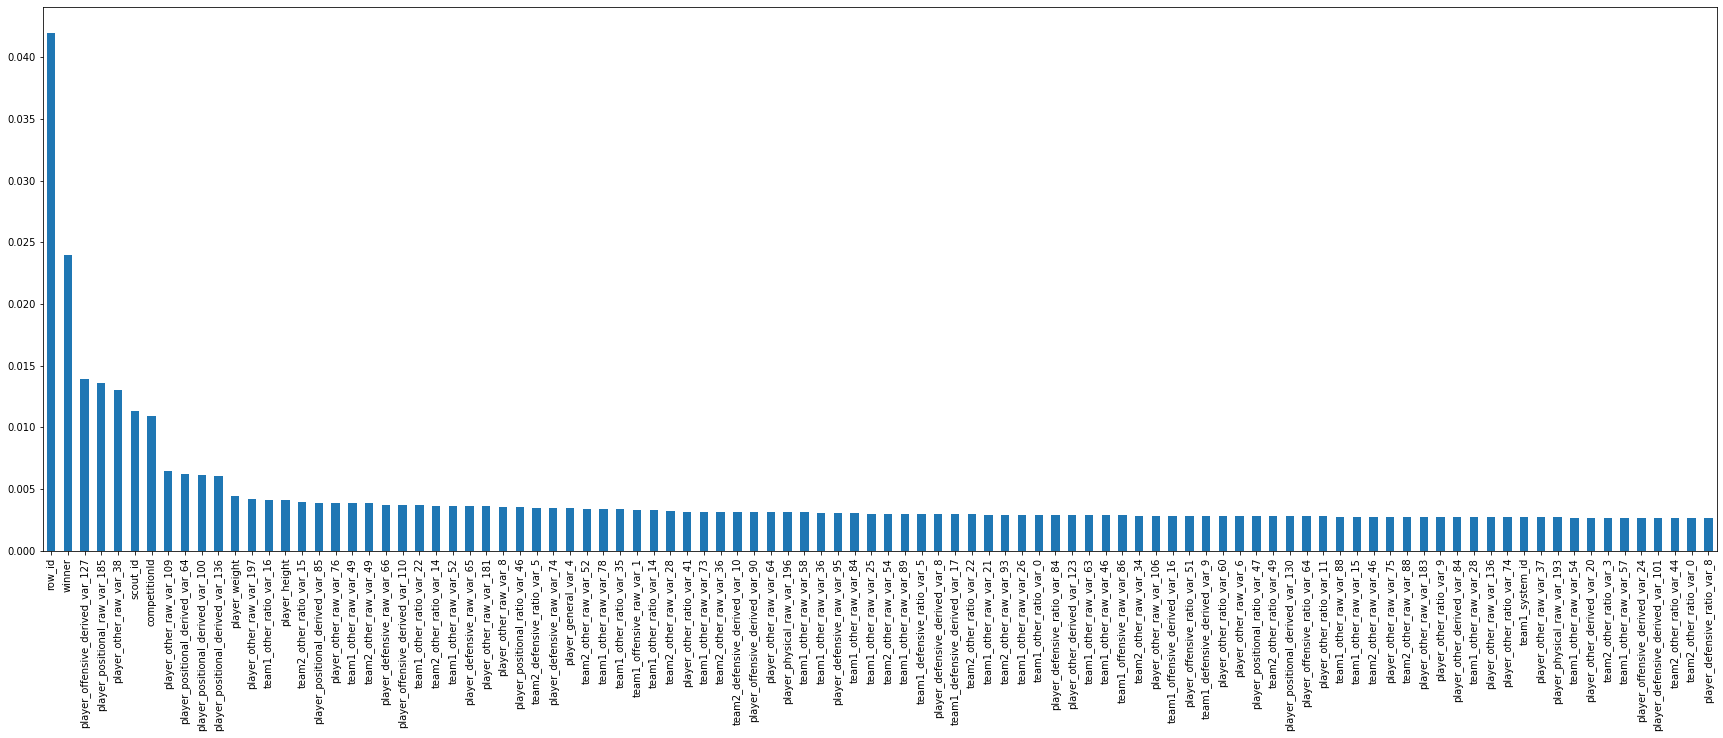

In [30]:
plt.figure(figsize = (30,10))
feat = pd.Series(imp,index = x.columns)
feat.nlargest(100).plot.bar()

In [31]:
feat.nlargest(100).index

Index(['row_id', 'winner', 'player_offensive_derived_var_127',
       'player_positional_raw_var_185', 'player_other_raw_var_38', 'scout_id',
       'competitionId', 'player_other_raw_var_109',
       'player_positional_derived_var_64', 'player_positional_derived_var_100',
       'player_positional_derived_var_136', 'player_weight',
       'player_other_raw_var_197', 'team1_other_ratio_var_16', 'player_height',
       'team2_other_ratio_var_15', 'player_positional_derived_var_85',
       'player_other_raw_var_76', 'team1_other_raw_var_49',
       'team2_other_raw_var_49', 'player_defensive_raw_var_66',
       'player_offensive_derived_var_110', 'team1_other_ratio_var_22',
       'team2_other_ratio_var_14', 'team1_other_raw_var_52',
       'player_defensive_raw_var_65', 'player_other_raw_var_181',
       'player_other_raw_var_8', 'player_positional_ratio_var_46',
       'team2_defensive_ratio_var_5', 'player_defensive_raw_var_74',
       'player_general_var_4', 'team2_other_raw_var_52',

In [32]:
x_new = df[feat.nlargest(100).index]

In [33]:
x_new

,row_id,winner,player_offensive_derived_var_127,player_positional_raw_var_185,player_other_raw_var_38,scout_id,competitionId,player_other_raw_var_109,player_positional_derived_var_64,player_positional_derived_var_100,player_positional_derived_var_136,player_weight,player_other_raw_var_197,team1_other_ratio_var_16,player_height,team2_other_ratio_var_15,player_positional_derived_var_85,player_other_raw_var_76,team1_other_raw_var_49,team2_other_raw_var_49,player_defensive_raw_var_66,player_offensive_derived_var_110,team1_other_ratio_var_22,team2_other_ratio_var_14,team1_other_raw_var_52,player_defensive_raw_var_65,player_other_raw_var_181,player_other_raw_var_8,player_positional_ratio_var_46,team2_defensive_ratio_var_5,player_defensive_raw_var_74,player_general_var_4,team2_other_raw_var_52,team1_other_raw_var_78,team1_other_ratio_var_35,team1_offensive_raw_var_1,team1_other_ratio_var_14,team2_other_raw_var_28,player_other_ratio_var_41,team1_other_raw_var_73,team2_other_raw_var_36,team2_defensive_derived_var_10,player_offensive_derived_var_90,player_other_raw_var_64,player_physical_raw_var_196,team1_other_raw_var_58,team1_other_raw_var_36,player_defensive_raw_var_95,team1_other_raw_var_84,team1_other_raw_var_25,team2_other_raw_var_54,team1_other_raw_var_89,team1_defensive_ratio_var_5,player_defensive_derived_var_8,team1_defensive_derived_var_17,team2_other_ratio_var_22,team1_other_raw_var_21,team2_other_raw_var_93,team1_other_raw_var_26,team1_other_ratio_var_0,player_defensive_ratio_var_84,player_other_derived_var_123,team1_other_raw_var_63,team1_other_raw_var_46,team1_offensive_raw_var_86,team2_other_raw_var_34,player_other_raw_var_106,team1_offensive_derived_var_16,player_offensive_ratio_var_51,team1_defensive_derived_var_9,player_other_ratio_var_60,player_other_raw_var_6,player_positional_ratio_var_47,team2_other_ratio_var_49,player_positional_derived_var_130,player_offensive_ratio_var_64,player_other_ratio_var_11,team1_other_raw_var_88,team1_other_raw_var_15,team2_other_raw_var_46,player_other_raw_var_75,team2_other_raw_var_88,player_other_raw_var_183,player_other_ratio_var_9,player_other_derived_var_84,team1_other_raw_var_28,player_other_raw_var_136,player_other_ratio_var_74,team1_system_id,player_other_raw_var_37,player_physical_raw_var_193,team1_other_raw_var_54,player_other_derived_var_20,team2_other_ratio_var_3,team1_other_raw_var_57,player_offensive_derived_var_24,player_defensive_derived_var_101,team2_other_ratio_var_44,team2_other_ratio_var_0,player_defensive_ratio_var_8
0,1,2,0.350145,0.281046,0.294118,13,8,0.017857,0.197428,0.197428,0.197428,0.48,0.763158,0.250000,0.317073,0.443396,0.021075,0.000,0.34,0.31,0.000000,0.028046,0.306859,0.126582,0.185185,0.000000,0.090909,0.0,0.045,0.373786,0.125,0.114754,0.222222,0.000,0.280728,0.276596,0.139241,0.193548,0.681,0.452830,0.255249,0.193658,0.426367,0.000000,0.305195,0.389474,0.396685,0.000000,0.461538,0.186548,0.425287,0.1,0.681230,0.000000,0.399916,0.361011,0.320755,0.186548,0.384615,0.100,0.043478,0.508503,0.272727,0.387342,0.15,0.000000,0.045455,0.151780,0.846,0.168753,0.872,0.467550,1.00,0.375,0.116477,0.333333,0.894,0.0625,0.291667,0.154430,0.00,0.1875,0.190476,0.375,0.508503,0.258065,0.300000,0.0,6.0,0.0,0.416667,0.183908,0.508503,0.000,0.327160,0.270555,0.000000,0.200,0.344,0.000
1,3,1,0.070744,0.076253,0.000000,16,8,0.089286,0.050385,0.050385,0.050385,0.42,0.355263,0.355769,0.463415,0.691824,0.009532,0.375,0.28,0.33,0.000000,0.000000,0.317690,0.151899,0.111111,0.000000,0.000000,0.0,0.625,0.427184,0.000,0.081967,0.185185,0.375,0.578149,0.234043,0.050633,0.322581,0.588,0.660377,0.471823,0.190500,0.116838,0.000000,0.043831,0.231579,0.370166,0.000000,0.153846,0.203046,0.333333,0.2,0.585761,0.000000,0.451959,0.267148,0.411950,0.203046,0.461538,0.278,0.130435,0.181319,0.254545,0.194937,0.50,0.000000,0.090909,0.285979,0.667,0.176722,0.882,0.436467,0.20,0.325,0.026901,0.333333,0.706,0.2500,0.500000,0.277215,0.00,0.1250,0.000000,0.500,0.181319,0.419355,0.100000,0.0,6.0,0.0,

In [34]:


x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=30)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(x_train, y_train)
r2_score(y_test, rr.predict(x_test))

0.357819584872321